Predicting Employee Churn with Machine Learning (Colab)

Classification model trained on 14,999 employees

The dataset contains 14,999 samples, and 9 attributes or features (6 integer, 2 float, and 2 objects), and 'left', the 'Target' variable  (what we want to predict).

The 10 variables are as follows:

1. satisfaction_level: employee satisfaction (0-1).  
2. last_evaluation: evaluated performance by the employer (0-1).
3. number_projects: numbers of projects assigned to an employee
4. average_monthly_hours: ave numbers of hours worked by an employee in a month
5. time_spent_company: employee experience measured as number of years in Co.
6. work_accident: Whether an employee has had a work accident
7. promotion_last_5years: promotion in the last 5 years
8. Departments: Employee's department
9. Salary: Salary level of the employee (low, medium and high).
10.left: 1 = employee left the Co. 0 = did not leave.

towardsdatascience.com/predict-customer-churn-the-right-way-using-pycaret-8ba6541608ac

In [23]:
pip install -U --pre pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 487 kB 5.6 MB/s 
     |████████████████████████████████| 3.3 MB 15.0 MB/s 
     |████████████████████████████████| 280 kB 39.6 MB/s 
     |████████████████████████████████| 106 kB 43.0 MB/s 
     |████████████████████████████████| 79.9 MB 119 kB/s 
     |████████████████████████████████| 15.7 MB 43.4 MB/s 
     |████████████████████████████████| 1.4 MB 57.5 MB/s 
     |████████████████████████████████| 199 kB 72.9 MB/s 
     |████████████████████████████████| 24.8 MB 1.3 MB/s 
     |████████████████████████████████| 282 kB 63.8 MB/s 
     |████████████████████████████████| 11.2 MB 64.4 MB/s 
     |████████████████████████████████| 44 kB 3.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 43 kB 491 kB/s 
     |██████████████████

In [1]:
#import modules
import pandas as pd  # for dataframes
import numpy as np
import plotly.express as px

In [2]:
#Mount your google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# read dataset into HRdf dataframe from Data Directory and display top and bottom rows of the dataframe
HRdf=pd.read_csv('/content/drive/MyDrive/Data/HR_Employee_churn-1.csv')
HRdf

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [4]:
#check attributes names, null values and datatypes using info().
#dataset contains 14,999 instances, and 9 features and 1 target (6 integer, 2 float, and 2 objects).
#float32 is a 32 bit number - float64 uses 64 bits.
#That means that float64’s take up twice as much memory - and doing operations on them may be a lot slower in some machine architectures.
#However, float64’s can represent numbers much more accurately than 32 bit floats.

HRdf.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Departments               object
salary                    object
dtype: object

In [5]:
HRdf.isnull().sum() # another way to count null values in dataset

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

In this dataset, we have two types of employee, those who stayed and those that left the company. Compare their characteristics by group (the column 'left'). Here, you can find the average of both the groups using groupby() and mean() function.

In [6]:
left = HRdf.groupby('left') #  (1=left, 0=remain with Co)
left.mean() # mean of the variables group by 'left' 1 and 0 ~ notice 'Departments' and 'salary' are not in the output (they are not numeric but objects)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Use the 'describe()' function in pandas to get various summary statistics. 

This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data (except 'Departments' and 'salary' are not in the output as they are not numeric but objects)

In [7]:
HRdf.describe() # Summary statistics of dataframe ~ use '.T' to transpose the table

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


**Data Visualization**

Compare the number of employees that left the company 'left' = 1 and those that stayed 'left' = 0

In [8]:
fig = px.scatter(x=HRdf['average_montly_hours'], y=HRdf['satisfaction_level'], 
                 color = HRdf['left'], template = 'presentation', 
                 opacity = 0.5, facet_col = HRdf['promotion_last_5years'], 
                 title = 'Customer Churn by Tenure, Satisfaction Level, and Department',
                 labels = {'x' : 'Customer Tenure', 'y' : 'Satisfaction'})
                
fig.show()

In [9]:
# check missing values
HRdf.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

In [10]:
# init setup
from pycaret.classification import *
#s = setup(HRdf, target = 'left', ignore_features = ['customerID'])
s = setup(HRdf, target = 'left')

,Description,Value
0,Session id,3529
1,Target,left
2,Target type,Binary
3,Original data shape,"(14999, 10)"
4,Transformed data shape,"(14999, 12)"
5,Transformed train set shape,"(10499, 12)"
6,Transformed test set shape,"(4500, 12)"
7,Numeric features,7
8,Categorical features,2
9,Preprocess,True


In [11]:
# compare all models
best_model = compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9870,0.9915,0.9568,0.9885,0.9723,0.9638,0.9641,0.8160
rf,Random Forest Classifier,0.9710,0.9914,0.8968,0.9821,0.9352,0.9167,0.9200,1.1750
lightgbm,Light Gradient Boosting Machine,0.7762,0.9731,0.1096,0.3708,0.1628,0.1220,0.1567,0.6220
gbc,Gradient Boosting Classifier,0.9209,0.9729,0.6980,0.9658,0.8043,0.7570,0.7763,0.8700
knn,K Neighbors Classifier,0.9417,0.9711,0.9180,0.8496,0.8824,0.8437,0.8449,0.4380
dt,Decision Tree Classifier,0.9678,0.9540,0.9276,0.9393,0.9324,0.9113,0.9122,0.2980
qda,Quadratic Discriminant Analysis,0.8871,0.9264,0.8604,0.7272,0.7862,0.7107,0.7171,0.1880
ada,Ada Boost Classifier,0.8568,0.8952,0.4404,0.9267,0.5879,0.5161,0.5723,0.4560
nb,Naive Bayes,0.7289,0.8395,0.8248,0.4618,0.5920,0.4125,0.4514,0.1850
lr,Logistic Regression,0.7885,0.8184,0.3444,0.5958,0.4360,0.3174,0.3356,1.8820


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [12]:
# print best_model parameters
print(best_model)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=3529, verbose=0, warm_start=False)


In [13]:
# tune best model
tuned_best_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8314,0.9039,0.7560,0.6197,0.6811,0.5680,0.5732
1,0.8267,0.8978,0.7240,0.6156,0.6654,0.5495,0.5528
2,0.8162,0.9019,0.7160,0.5947,0.6497,0.5266,0.5307
3,0.8200,0.8918,0.7160,0.6027,0.6545,0.5340,0.5376
4,0.8019,0.8731,0.7000,0.5682,0.6272,0.4943,0.4993
5,0.8143,0.8777,0.6880,0.5952,0.6382,0.5142,0.5166
6,0.8324,0.8994,0.7400,0.6250,0.6777,0.5655,0.5692
7,0.8152,0.8880,0.7160,0.5927,0.6486,0.5247,0.5290
8,0.8162,0.8804,0.6720,0.6022,0.6352,0.5128,0.5142


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve. The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

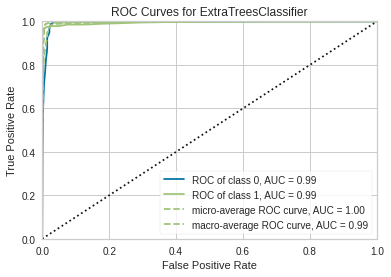

In [14]:
# AUC Plot
plot_model(tuned_best_model, plot = 'auc')

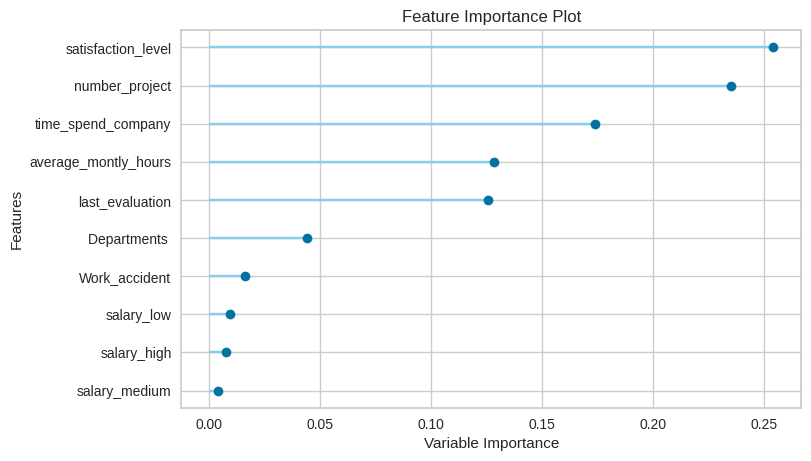

In [15]:
# Feature Importance Plot
plot_model(tuned_best_model, plot = 'feature')

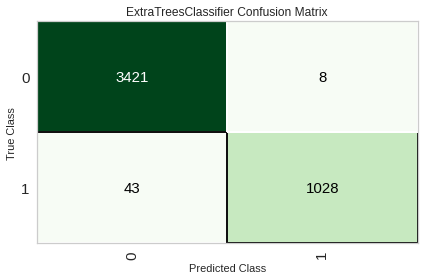

In [16]:
# Confusion Matrix
plot_model(tuned_best_model, plot = 'confusion_matrix')

In [17]:
# create a custom function
def calculate_profit(y, y_pred):
    tp = np.where((y_pred==1) & (y==1), (5000-1000), 0)
    fp = np.where((y_pred==1) & (y==0), -1000, 0)
    return np.sum([tp,fp])
# add metric to PyCaret
add_metric('profit', 'Profit', calculate_profit)

Name                                                        Profit
Display Name                                                Profit
Score Function       <function calculate_profit at 0x7f0a724c4a70>
Scorer                               make_scorer(calculate_profit)
Target                                                        pred
Args                                                            {}
Greater is Better                                             True
Multiclass                                                    True
Custom                                                        True
Name: profit, dtype: object

In [18]:
# compare all models
best_model = compare_models(sort='Profit')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Profit,TT (Sec)
et,Extra Trees Classifier,0.9870,0.9915,0.9568,0.9885,0.9723,0.9638,0.9641,954000.0000,0.9260
dt,Decision Tree Classifier,0.9678,0.9540,0.9276,0.9393,0.9324,0.9113,0.9122,911900.0000,0.2270
rf,Random Forest Classifier,0.9710,0.9914,0.8968,0.9821,0.9352,0.9167,0.9200,892200.0000,0.8530
knn,K Neighbors Classifier,0.9417,0.9711,0.9180,0.8496,0.8824,0.8437,0.8449,877300.0000,0.4590
qda,Quadratic Discriminant Analysis,0.8871,0.9264,0.8604,0.7272,0.7862,0.7107,0.7171,776800.0000,0.1900
gbc,Gradient Boosting Classifier,0.9209,0.9729,0.6980,0.9658,0.8043,0.7570,0.7763,690400.0000,0.8710
nb,Naive Bayes,0.7289,0.8395,0.8248,0.4618,0.5920,0.4125,0.4514,584000.0000,0.3260
ada,Ada Boost Classifier,0.8568,0.8952,0.4404,0.9267,0.5879,0.5161,0.5723,430000.0000,0.4600
lr,Logistic Regression,0.7885,0.8184,0.3444,0.5958,0.4360,0.3174,0.3356,286200.0000,0.7560
lda,Linear Discriminant Analysis,0.7783,0.8153,0.3240,0.5583,0.4096,0.2851,0.3011,260200.0000,0.2110


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

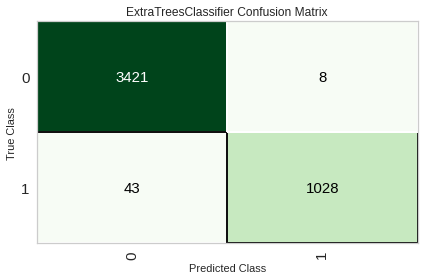

In [19]:
# confusion matrix
plot_model(best_model, plot = 'confusion_matrix')